# Assignments for "Feature Engineering - Part 2"

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('states_all.csv')

**(1)** Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [3]:
df["overall_score"] = (df["GRADES_4_G"]* ((df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"]) * 0.5) + df["GRADES_8_G"]
* ((df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"]) *  0.5))/ (df["GRADES_4_G"] + df["GRADES_8_G"])

**(2)** What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

In [5]:
education_corr = df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

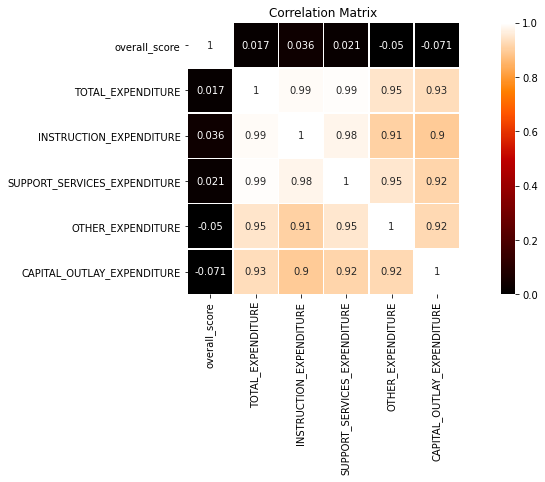

In [6]:
plt.figure(figsize=(15,5))

sns.heatmap(education_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='gist_heat')
plt.title("Correlation Matrix")

plt.show()

In [7]:
# According to the correlation graph, the variable most correlated with the overall score is instruction expenditure.

**(3)** Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df1=df.loc[:,["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

df1.dropna(inplace=True) 

df1_new=StandardScaler().fit_transform(df1)
pca=PCA(n_components=4)
principalcomponents=pca.fit_transform(df1_new)

In [15]:
print('The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n',sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.94685038 0.03050247 0.01917439 0.00347276]


**(4)** What is the correlation between the GPA you created and the first principal component?

In [20]:
corr2 = df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

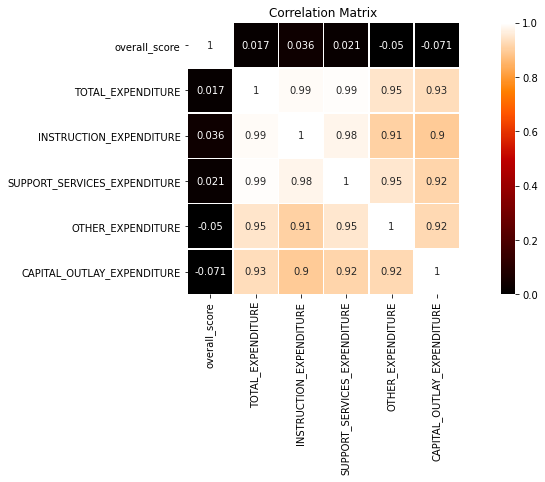

In [21]:
plt.figure(figsize=(15,5))

sns.heatmap(corr2, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='gist_heat')
plt.title("Correlation Matrix")

plt.show()